In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
from os import path

In [25]:
lrs = ["1e-3"] # , "5e-5"]

folders = [
    # lr 1e-3
    {
        "training_results/mnist-simplefcn-lr-0.001/": "SimpleFCN",
        "training_results/mnist-unet_v2-lr-0.001/": "Mini U-Net",
        "training_results/mnist-unet_paper-lr-0.001/":"U-Net"
    } #,

    # {
    #  dict for lr 5e-5 here.
    # }
]

In [26]:
series = []
classes = []

for shape_ind, folder_set in enumerate(folders):
    for dirpath, name in folder_set.items():
        with open(path.join(dirpath, "train_losses.txt")) as tl:
            losses = [float(x) for x in tl.readlines()]
        
        series.append(losses)
        classes.append(name)

In [37]:
for s in series:
    print(s)

[0.9026937474144829, 0.8670673167705536, 0.8581431097454495, 0.8520094439718459, 0.8464962322182126, 0.84106288406584, 0.8355673995282915, 0.8300899789068434, 0.8248497251669565, 0.8200539053810967, 0.8158188108603159, 0.8121542143821716, 0.8089748975965712, 0.8060800320572323, 0.803042469157113, 0.7996970991293589, 0.7962827976544699, 0.793071430656645, 0.790250608921051, 0.7879133160909016, 0.7859854230615828, 0.7843648305204179, 0.7829757151338789, 0.7817671916219924, 0.7807014237509834, 0.7797555741998884, 0.7789095460044013, 0.7781497640079922, 0.7774635810322231, 0.7768417966365814, 0.7762753746244643, 0.775758471886317, 0.7752847195996179, 0.7748499980237749, 0.7744500207901001, 0.7740823839770423, 0.773743898736106, 0.7734318991502126, 0.7731436493661669, 0.7728775086667803, 0.7726310226652358, 0.7724030394024319, 0.7721917794810401, 0.7719956518544091, 0.771813573969735, 0.7716443716155158, 0.7714869830343458, 0.7713405289914873, 0.7712040193875631, 0.7710767609543271]
[0.9581

Text(0.5, 0, 'Epoch')

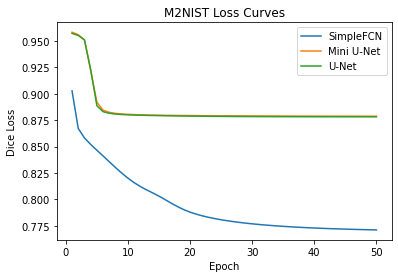

In [34]:
for s, c in zip(series, classes):
    sns.lineplot(x =[i + 1 for i in range(len(s))], y = s, label=c)
plt.title("M2NIST Loss Curves")
plt.ylabel("Dice Loss")
plt.xlabel("Epoch")